In [ ]:
!nvidia-smi

Mon Jul 19 11:47:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    29W /  70W |   2112MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Download ID:
* Diabetics dataset : 1l71UNNM-KSpPfyWOC9meK0G1ZhRJ6M9K
    command line `!gdown --id 1l71UNNM-KSpPfyWOC9meK0G1ZhRJ6M9K`

In [ ]:
!gdown --id 1EcmpoDTf42On-Y7EOY1nBxs4QqLTSmAt

Downloading...
From: https://drive.google.com/uc?id=1EcmpoDTf42On-Y7EOY1nBxs4QqLTSmAt
To: /content/iris.zip
100% 411k/411k [00:00<00:00, 2.77MB/s]


In [ ]:
!gdown --id 1iwYF9yPht_y_cJ_Y6sQ0jf4omEi_8rl5

Downloading...
From: https://drive.google.com/uc?id=1iwYF9yPht_y_cJ_Y6sQ0jf4omEi_8rl5
To: /content/iris.zip
100% 573k/573k [00:00<00:00, 3.50MB/s]


In [ ]:
!unzip /content/iris.zip

Archive:  /content/iris.zip
   creating: content/iris/
   creating: content/iris/3/
  inflating: content/iris/3/149.png  
  inflating: content/iris/3/124.png  
  inflating: content/iris/3/123.png  
  inflating: content/iris/3/137.png  
  inflating: content/iris/3/107.png  
  inflating: content/iris/3/109.png  
  inflating: content/iris/3/148.png  
  inflating: content/iris/3/106.png  
  inflating: content/iris/3/103.png  
  inflating: content/iris/3/131.png  
  inflating: content/iris/3/113.png  
  inflating: content/iris/3/126.png  
  inflating: content/iris/3/121.png  
  inflating: content/iris/3/102.png  
  inflating: content/iris/3/119.png  
  inflating: content/iris/3/116.png  
  inflating: content/iris/3/138.png  
  inflating: content/iris/3/133.png  
  inflating: content/iris/3/122.png  
  inflating: content/iris/3/110.png  
  inflating: content/iris/3/130.png  
  inflating: content/iris/3/127.png  
  inflating: content/iris/3/134.png  
  inflating: content/iris/3/101.png  
  in

In [ ]:
#!unzip /content/HeartDiseasesdataset.zip

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders  # or import split_folders
splitfolders.ratio("/content/content/iris", seed=1337, ratio=(.9,  .1), group_prefix=None) # default values

Copying files: 150 files [00:00, 7001.63 files/s]


###Import Libraries

In [ ]:

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [ ]:
os.listdir("/content/output/val")

['3', '1', '2']

###Dataloaders

In [ ]:
# Data augmentation and normalization for training
# Just normalization/content/content/HeartDiseasesdataset for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/output/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
dataset_sizes, class_names, device

({'train': 135, 'val': 15}, ['1', '2', '3'], device(type='cuda', index=0))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


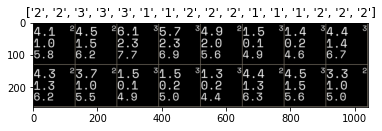

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### Custom Functions

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_openml

In [ ]:
def train_simple_network_with_input_reshape(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                                            epochs=25, device="cpu", checkpoint_file=None):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    Here used the method provided in lecture only added code to flatten the inputs before passing to linear model
    """
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = inputs.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #flatten the input to fit in linear model
            y_hat = model(inputs) #this just computed f_Θ(x(i))#pass in a flattened view of inputs

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * inputs.size(0)
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)

                #flatten the input to fit in linear model
                y_hat = model(inputs) #pass in a flattened view of inputs
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * inputs.size(0)

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
                
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'c': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    res_dict = {}
    epoch_loss_list = []
    epoch_acc_list = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            epoch_loss_list.append(epoch_loss)
            epoch_acc_list.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            res_dict[phase] = epoch_acc_list
            


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_loss_list, epoch_acc_list,res_dict

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

###Train & Validations

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

In [ ]:
torch.save(model_ft, "resnet_ft_iris.pth")
model_ft = torch.load("/content/resnet_ft_iris.pth")


In [ ]:
# loss_func = nn.CrossEntropyLoss()
# results_pd1 = train_simple_network_with_input_reshape(model_ft, loss_func, dataloaders['train'], epochs=25, val_loader=dataloaders['val'],
#                                                       checkpoint_file='model_ft_1.pt', score_funcs={'Acc':accuracy_score}, device=device)

In [ ]:
# sns.lineplot(x='epoch', y='train Acc', data=results_pd1, label='Train')
# sns.lineplot(x='epoch', y='val Acc', data=results_pd1, label='Validation')

In [ ]:
#pr, tpr, _ = roc_curve(y, y_score)
#roc_auc = auc(fpr, tpr)
print("average_precision_score : {}".format(average_precision_score(y, y_score)))
print("roc_auc_score : {}".format(str(roc_auc_score(y, y_score))))
print("accuracy : {}".format(str(accuracy_score(y, y_score))))

In [ ]:
nb_classes = len(class_names)

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

print(confusion_matrix.diag()/confusion_matrix.sum(1))

plt.figure(figsize=(15,10))

# class_names = ['0','1']
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#print('Test accuracy:{:.4f}'.format(correct.double() / dataset_sizes['val']))
print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))

In [ ]:
model_ft = models.densenet121(pretrained=True)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

In [ ]:
torch.save(model_ft, "densenet_ft_iris.pth")
model_ft = torch.load("/content/densenet_ft_iris.pth")

In [ ]:
model_ft = models.googlenet(pretrained=True)
#num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.3)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


In [ ]:
model_ft, ep_loss, ep_acc, res_dict = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=20)

Epoch 0/19
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


RuntimeError: ignored

In [ ]:
torch.save(model_ft, "inception_ft_iris.pth")
model_ft = torch.load("/content/inception_ft_iris.pth")

In [ ]:
def getConfusionMatrix(model, show_image=False):
    model.eval() #set the model to evaluation mode
    confusion_matrix=np.zeros((2,2),dtype=int) #initialize a confusion matrix
    num_images=dataloaders['val'] #size of the testset
    
    with torch.no_grad(): #disable back prop to test the model
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            #get predictions of the model
            outputs = model(inputs) 
            _, preds = torch.max(outputs, 1) 
            
            #get confusion matrix
            for j in range(inputs.size()[0]): 
                if preds[j]==1 and labels[j]==1:
                    term='TP'
                    confusion_matrix[0][0]+=1
                elif preds[j]==1 and labels[j]==0:
                    term='FP'
                    confusion_matrix[1][0]+=1
                elif preds[j]==0 and labels[j]==1:
                    term='FN'
                    confusion_matrix[0][1]+=1
                elif preds[j]==0 and labels[j]==0:
                    term='TN'
                    confusion_matrix[1][1]+=1
                #show image and its class in confusion matrix    
                if show_image:
                    print('predicted: {}'.format(class_names[preds[j]]))
                    print(term)
                    imshow(inputs.cpu().data[j])
                    print()
        #print results
        print('Confusion Matrix: ')
        print(confusion_matrix)
        print()
        print('Sensitivity: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
        print('Specificity: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0]))
        print('PPV: ', 100*confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0]))
        print('NPV: ', 100*confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1]))
        
        return confusion_matrix

In [ ]:
conf_mat = getConfusionMatrix(model_ft)
#conf_mat


In [ ]:
# epochs= np.arange(start=0, stop=25, step=1)

# plt.plot(epochs, train_acc[0], 'g', label='Training acc')
# plt.plot(epochs, val_acc[0], 'b', label='validation acc')
# plt.title('Training and Validation acc')
# plt.xlabel('Epochs')
# plt.ylabel('acc')
# plt.legend()
# plt.show()

In [ ]:
## save the model...
torch.save(model_ft, "model_ft_diabetics_96.pth")   

In [ ]:
# visualize_model(model_ft)

###Convolutional Layer Fixed

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=50)

In [ ]:
torch.save(model_conv, "model_conv_diabetics_94.pth")

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()